In [1]:
from fastai import *
from fastai.tabular import *
seed =23
def random_seed(seed_value):
  import random 
  random.seed(seed_value) # Python
  import numpy as np
  np.random.seed(seed_value) # cpu vars
  import torch
  torch.manual_seed(seed_value) # cpu  vars
  if torch.cuda.is_available(): 
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value) # gpu vars
    torch.backends.cudnn.deterministic = True  #needed
    torch.backends.cudnn.benchmark = False

In [2]:
data = pd.read_csv('Bro. Samuel.csv')
data.drop('number',axis = 1,inplace = True)

In [3]:
random_seed(3)
data.head(4)

,Mass,Length,Breadth,Thickness,Dg,phi,S,Ap,Vellip
0,1.50,25.9,14.4,9.0,14.932,0.577,700.491,175.123,1757.533
1,1.46,24.6,14.7,9.2,14.888,0.605,696.352,174.088,1741.963
2,1.30,23.5,14.4,9.9,14.923,0.635,699.590,174.897,1754.140
3,1.41,24.3,14.4,9.0,14.619,0.602,671.365,167.841,1648.959


In [4]:
from sklearn.decomposition import PCA
pca = PCA()
train = pca.fit_transform(data.drop('Mass',axis = 1))


In [5]:
train

array([[-7.817380e+00, -1.071341e+00, -1.057145e+00, -1.637663e-01,  7.131382e-03, -2.507901e-03,  6.393909e-04,
         2.173778e-04],
       [ 8.329273e+00, -1.167731e+00,  2.403249e-01, -3.705140e-01, -1.018704e-02, -2.193073e-03, -6.466232e-04,
        -3.117500e-06],
       [-4.293949e+00, -1.107988e+00,  1.469570e+00,  2.213003e-01, -9.917292e-03, -3.333081e-03,  1.218484e-03,
        -4.474884e-04],
       [ 1.048349e+02, -1.440560e+00,  2.238898e-01, -2.909474e-01, -7.018265e-03,  5.673578e-04, -4.570329e-05,
        -2.431208e-04],
       ...,
       [-8.547492e+01, -4.832632e-01,  3.807158e-01,  2.658586e-01, -2.398320e-02, -3.152671e-03, -4.362489e-05,
        -4.599265e-04],
       [ 2.331686e+02, -1.072130e+00,  9.488503e-01,  1.545908e-01, -1.836257e-02,  5.551711e-03,  7.475913e-04,
        -4.513460e-04],
       [-1.227700e+02, -9.180247e-02, -1.640211e+00,  1.268342e+00,  2.227053e-02, -4.009298e-03,  1.692725e-03,
        -4.657239e-04],
       [ 2.316226e+02, -1.072

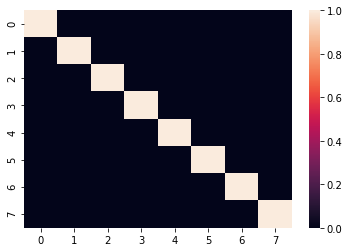

In [6]:
import seaborn as sns
sns.heatmap(pd.DataFrame(train).corr())

In [7]:
train1 = pd.DataFrame(train)

In [8]:
train = pd.concat([train1,data['Mass']],axis = 1)


In [9]:
dep_var = 'Mass'
cont_names = train.columns#'
cat_names = [	]# 
procs = [FillMissing, Categorify, Normalize]

In [10]:
#test = TabularList.from_df(test, cat_names = cat_names, cont_names=cont_names, procs=procs)

In [11]:
#data = (TabularList.from_df(train,path="", cat_names = cat_names,cont_names = cont_names,procs =procs).split_by_rand_pct(valid_pct = 0.3, seed = 42).label_from_df(cols=dep_var).add_test(test,label=0).databunch(bs =16))
data = (TabularList.from_df(train,path="", cat_names = cat_names,cont_names = cont_names,procs =procs).split_by_rand_pct(valid_pct = 0.3, seed = 42).label_from_df(cols=dep_var).databunch(bs =16))

In [12]:
data.show_batch(rows=5)

0,1,2,3,4,5,6,7,Mass,target
0.9354,-0.2602,0.8964,-0.6944,-0.0728,0.5069,0.4251,-0.7829,0.5733,1.5
-0.4601,-0.0901,-1.7171,1.6292,0.5593,-0.6775,1.4246,-0.7513,0.0994,1.42
1.1831,-0.1881,0.7885,-1.5678,0.9141,0.6022,-0.2164,-0.8724,-0.3744,1.34
0.0521,-0.2580,-1.1330,-0.3284,0.3204,-0.3224,-0.1995,-1.6808,-0.8482,1.26
0.0076,-0.2488,-1.3319,1.9693,0.7965,-0.7353,0.1704,-0.6870,-0.0783,1.39


In [13]:
random_seed(3)
learn = tabular_learner(data,layers=[20,76,19], ps=[0.1,0.01,0.01], emb_drop=0.04, opt_func=optim.Adam, metrics = rmse)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


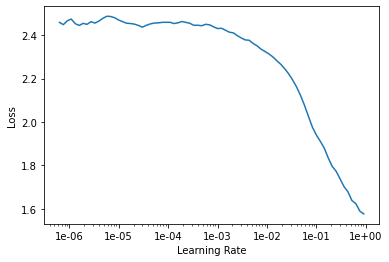

In [14]:
random_seed(3)
learn.lr_find()
learn.recorder.plot(Suggestion = True)

In [15]:
random_seed(3)
learn.fit_one_cycle(30, 0.1, moms=(0.8,0.7),wd=0.01,div_factor=20)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1.912393,1.504631,1.226425,00:00
1,1.189124,0.099504,0.310748,00:00
2,0.696814,0.016670,0.125889,00:00
3,0.437162,0.008427,0.090384,00:00
4,0.291505,0.013778,0.116894,00:00
5,0.203656,0.006014,0.074283,00:00
6,0.145349,0.001988,0.043772,00:00
7,0.105910,0.008825,0.093684,00:00
8,0.079699,0.002997,0.054349,00:00
9,0.061491,0.015877,0.125594,00:00


In [16]:
from sklearn.metrics import mean_squared_error
pred_val_1 = learn.get_preds(DatasetType.Valid)
print(mean_squared_error(pred_val_1[1], pred_val_1[0])**0.5)

#pred_test, label_test = learn.get_preds(DatasetType.Test)
#pred_test_1 = pred_test

0.01946354545519515


In [35]:
r2_score(pred_val_1[1], pred_val_1[0])

tensor(0.9539)

In [30]:
true = pd.DataFrame(pred_val_1[1].numpy())
predicted = pd.DataFrame(pred_val_1[0].numpy())

In [32]:
result = pd.concat([true,predicted],axis = 1)

In [34]:
result.to_csv("Fastai predications.csv")